<a href="https://colab.research.google.com/github/dandan8585/challenge-store-1/blob/main/store_juan_challeng1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [19]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Analisis de Ingresos



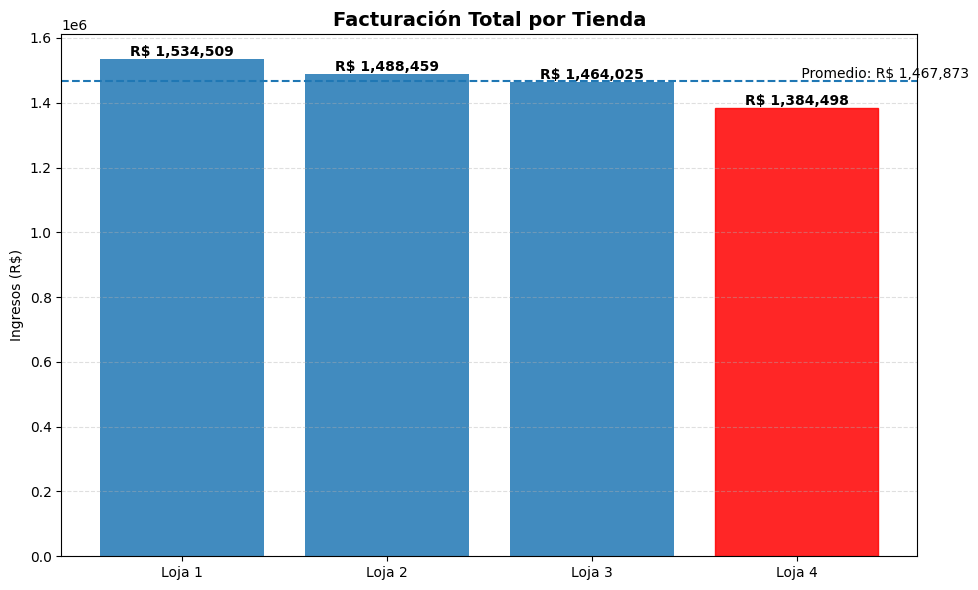

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate total sales for each store
faturamento_1 = loja1['Preço'].sum()
faturamento_2 = loja2['Preço'].sum()
faturamento_3 = loja3['Preço'].sum()
faturamento_4 = loja4['Preço'].sum()

# Crear DataFrame
faturamento = pd.DataFrame({
    'Tienda': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Facturación': [faturamento_1, faturamento_2, faturamento_3, faturamento_4]
})

# Ordenar de mayor a menor
faturamento = faturamento.sort_values(by='Facturación', ascending=False)

# Calcular promedio general
promedio_general = faturamento['Facturación'].mean()

# Crear figura
fig, ax = plt.subplots(figsize=(10,6))

bars = ax.bar(faturamento['Tienda'], faturamento['Facturación'], alpha=0.85)

# Resaltar la tienda con MENOR facturación (última después de ordenar)
bars[-1].set_color('red')

# Agregar etiquetas monetarias
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'R$ {height:,.0f}',
        ha='center',
        va='bottom',
        fontweight='bold'
    )

# Línea de promedio
ax.axhline(promedio_general, linestyle='--')
ax.text(
    3,
    promedio_general,
    f' Promedio: R$ {promedio_general:,.0f}',
    va='bottom'
)

# Estética ejecutiva
ax.set_title('Facturación Total por Tienda', fontsize=14, fontweight='bold')
ax.set_ylabel('Ingresos (R$)')
ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. Ventas por Categoria

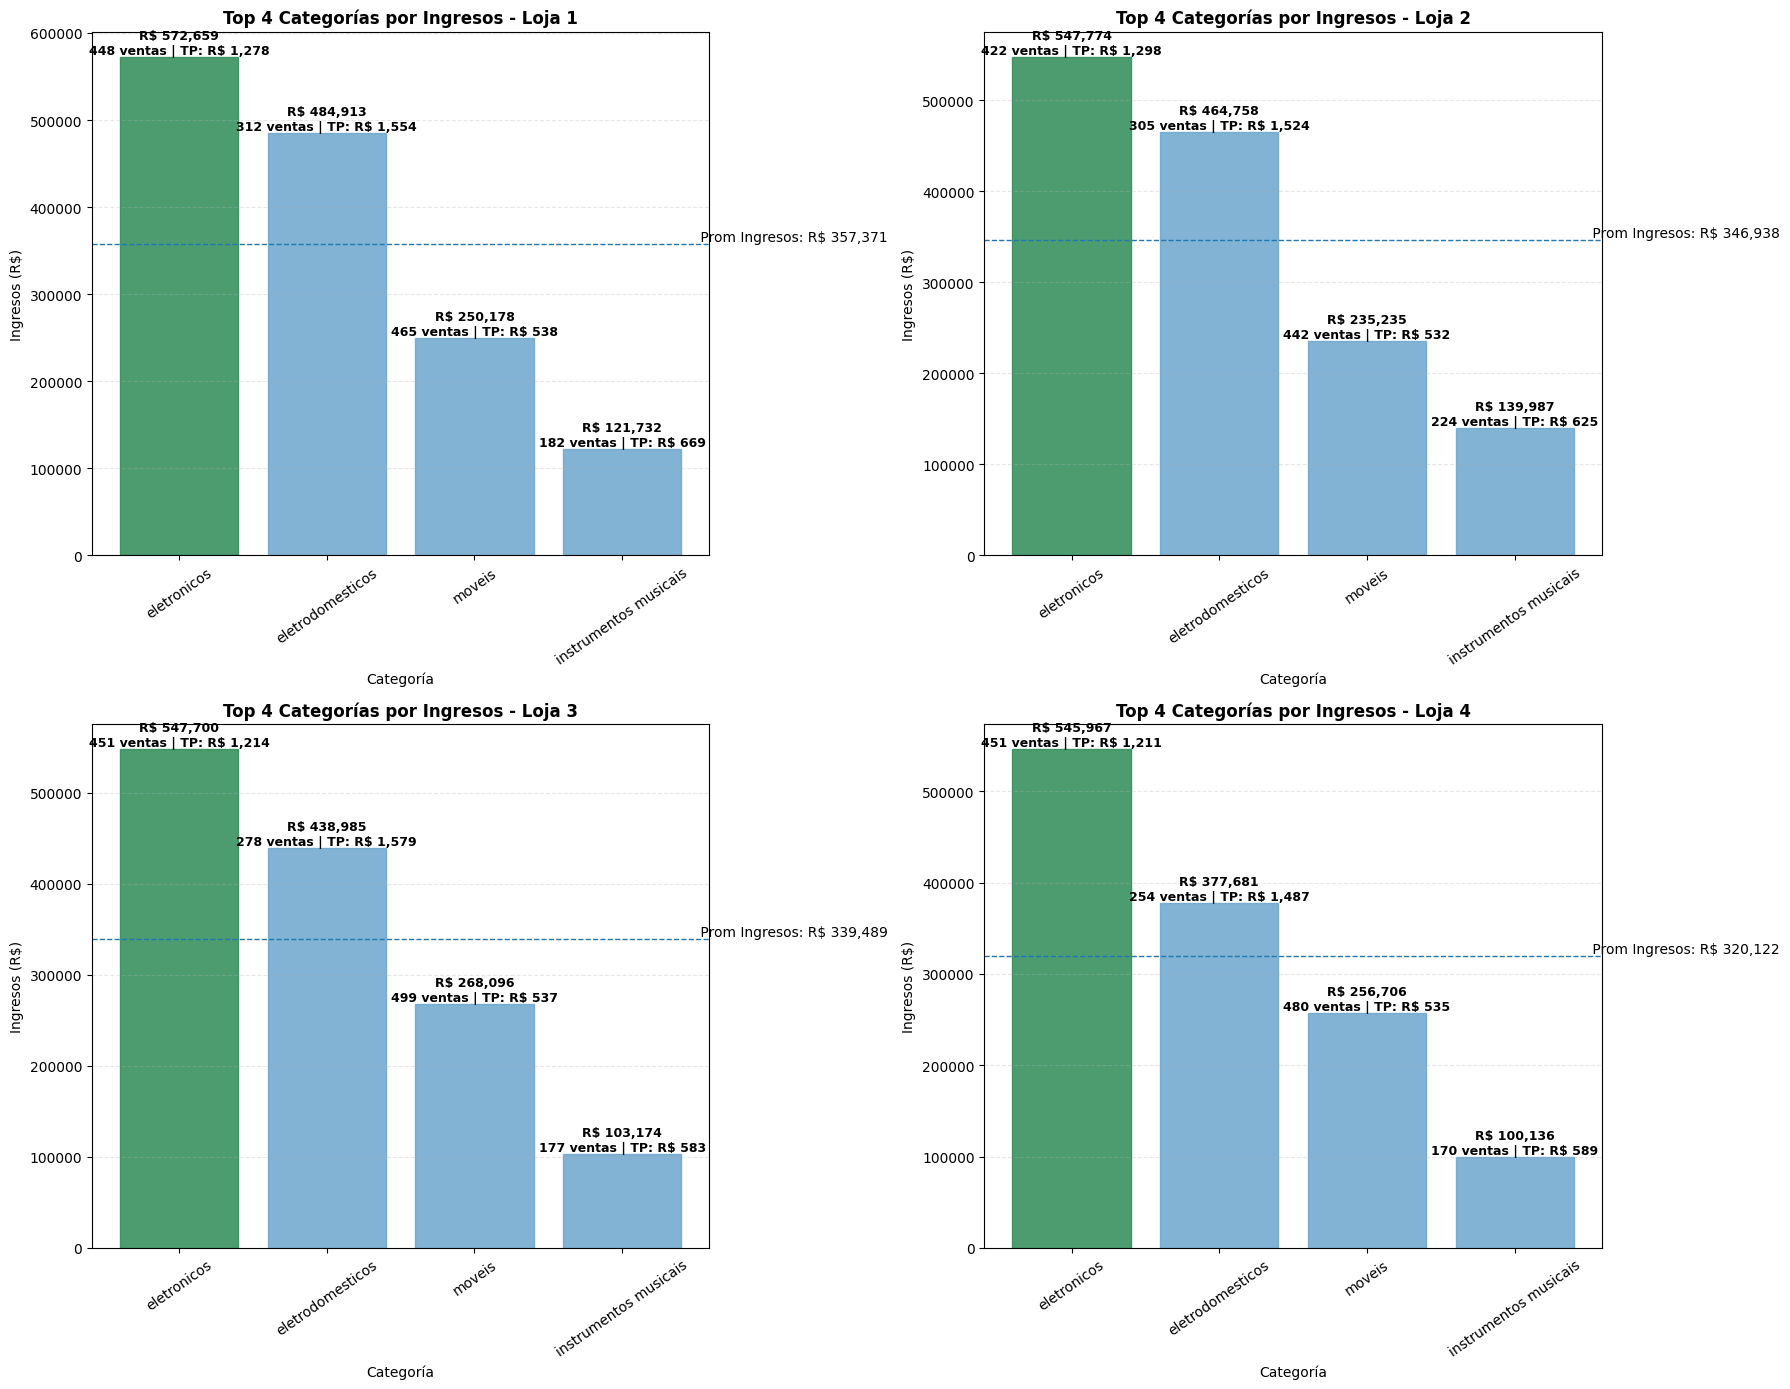

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(18, 14))

lojas = {
    'Loja 1': loja1,
    'Loja 2': loja2,
    'Loja 3': loja3,
    'Loja 4': loja4
}

for ax, (nombre, df) in zip(axs.flat, lojas.items()):

    # Agrupar por categoría con métricas completas
    categoria_data = (
        df.groupby('Categoria do Produto')
        .agg(
            Ingresos=('Preço', 'sum'),
            Cantidad=('Preço', 'count'),
            Ticket_Promedio=('Preço', 'mean')
        )
        .sort_values(by='Ingresos', ascending=False)
        .head(4)
    )

    promedio = categoria_data['Ingresos'].mean()

    bars = ax.bar(
        categoria_data.index,
        categoria_data['Ingresos'],
        alpha=0.85
    )

    # Resaltar la categoría líder
    bars[0].set_color('#2E8B57')
    for bar in bars[1:]:
        bar.set_color('#6CA6CD')

    # Etiquetas completas
    for bar, (categoria, row) in zip(bars, categoria_data.iterrows()):
        ax.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height(),
            f"R$ {row['Ingresos']:,.0f}\n"
            f"{int(row['Cantidad'])} ventas | TP: R$ {row['Ticket_Promedio']:,.0f}",
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='bold'
        )

    # Línea promedio ingresos
    ax.axhline(promedio, linestyle='--', linewidth=1)
    ax.text(
        len(categoria_data)-0.5,
        promedio,
        f' Prom Ingresos: R$ {promedio:,.0f}',
        va='bottom'
    )

    # Estética ejecutiva
    ax.set_title(f'Top 4 Categorías por Ingresos - {nombre}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Categoría')
    ax.set_ylabel('Ingresos (R$)')
    ax.tick_params(axis='x', rotation=35)
    ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


In [22]:
resumen = []

tiendas = {
    'Loja 1': loja1,
    'Loja 2': loja2,
    'Loja 3': loja3,
    'Loja 4': loja4
}

for nombre, df in tiendas.items():

    facturacion = df['Preço'].sum()
    cantidad_total = df['Preço'].count()
    ticket_promedio = df['Preço'].mean()
    evaluacion_promedio = df['Avaliação da compra'].mean()
    envio_promedio = df['Frete'].mean()

    # Agrupación por categoría
    categoria_data = (
        df.groupby('Categoria do Produto')
        .agg(
            Ingresos=('Preço', 'sum'),
            Cantidad=('Preço', 'count')
        )
        .sort_values(by='Ingresos', ascending=False)
    )

    categoria_lider = categoria_data.index[0]
    ingresos_categoria_lider = categoria_data.iloc[0]['Ingresos']
    cantidad_categoria_lider = categoria_data.iloc[0]['Cantidad']

    concentracion = (ingresos_categoria_lider / facturacion) * 100
    total_categorias = df['Categoria do Produto'].nunique()

    resumen.append([
        nombre,
        facturacion,
        cantidad_total,
        ticket_promedio,
        evaluacion_promedio,
        envio_promedio,
        total_categorias,
        categoria_lider,
        ingresos_categoria_lider,
        cantidad_categoria_lider,
        concentracion
    ])

df_resumen = pd.DataFrame(resumen, columns=[
    'Tienda',
    'Facturación Total',
    'Total Ventas',
    'Ticket Promedio',
    'Evaluación Promedio',
    'Costo Envío Promedio',
    'N° Categorías',
    'Categoría Líder',
    'Ingresos Categoría Líder',
    'Ventas Categoría Líder',
    '% Concentración Categoría Líder'
])

df_resumen


,Tienda,Facturación Total,Total Ventas,Ticket Promedio,Evaluación Promedio,Costo Envío Promedio,N° Categorías,Categoría Líder,Ingresos Categoría Líder,Ventas Categoría Líder,% Concentración Categoría Líder
0,Loja 1,1534509.12,2359,650.491361,3.976685,34.691805,8,eletronicos,572659.23,448.0,37.318724
1,Loja 2,1488459.06,2359,630.970352,4.037304,33.621941,8,eletronicos,547773.71,422.0,36.801396
2,Loja 3,1464025.03,2359,620.612560,4.048326,33.074464,8,eletronicos,547699.92,451.0,37.410557
3,Loja 4,1384497.58,2358,587.149101,3.995759,31.278997,8,eletronicos,545966.86,451.0,39.434295


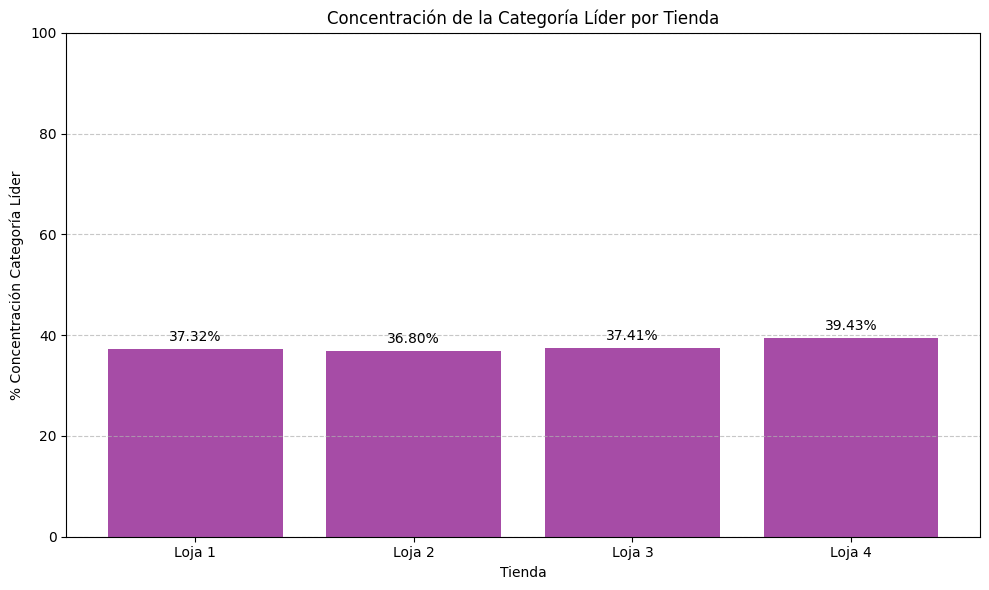

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure df_resumen is available (assuming it's already in the kernel from previous execution)
# If df_resumen is not in the kernel, uncomment and run the code from cell -QoDI1ZojA7X first:
# resumen = []
# tiendas = {
#     'Loja 1': loja1,
#     'Loja 2': loja2,
#     'Loja 3': loja3,
#     'Loja 4': loja4
# }
# for nombre, df in tiendas.items():
#     facturacion = df['Preço'].sum()
#     cantidad_total = df['Preço'].count()
#     ticket_promedio = df['Preço'].mean()
#     evaluacion_promedio = df['Avaliação da compra'].mean()
#     envio_promedio = df['Frete'].mean()
#     top_categoria = (
#         df.groupby('Categoria do Produto')['Preço']
#         .sum()
#         .sort_values(ascending=False)
#         .iloc[0]
#     )
#     concentracion = (top_categoria / facturacion) * 100
#     resumen.append([
#         nombre,
#         facturacion,
#         cantidad_total,
#         ticket_promedio,
#         evaluacion_promedio,
#         envio_promedio,
#         concentracion
#     ])
# df_resumen = pd.DataFrame(resumen, columns=[
#     'Tienda',
#     'Facturación Total',
#     'Total Ventas',
#     'Ticket Promedio',
#     'Evaluación Promedio',
#     'Costo Envío Promedio',
#     '% Concentración Categoría Líder'
# ])


plt.figure(figsize=(10, 6))
plt.bar(df_resumen['Tienda'], df_resumen['% Concentración Categoría Líder'], color='purple', alpha=0.7)
plt.xlabel('Tienda')
plt.ylabel('% Concentración Categoría Líder')
plt.title('Concentración de la Categoría Líder por Tienda')
plt.ylim(0, 100) # Percentage scale

# Add labels to the bars
for index, row in df_resumen.iterrows():
    plt.text(row['Tienda'], row['% Concentración Categoría Líder'] + 1,
             f'{row["% Concentración Categoría Líder"]:.2f}%',
             ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Calificación Promedio de la Tienda


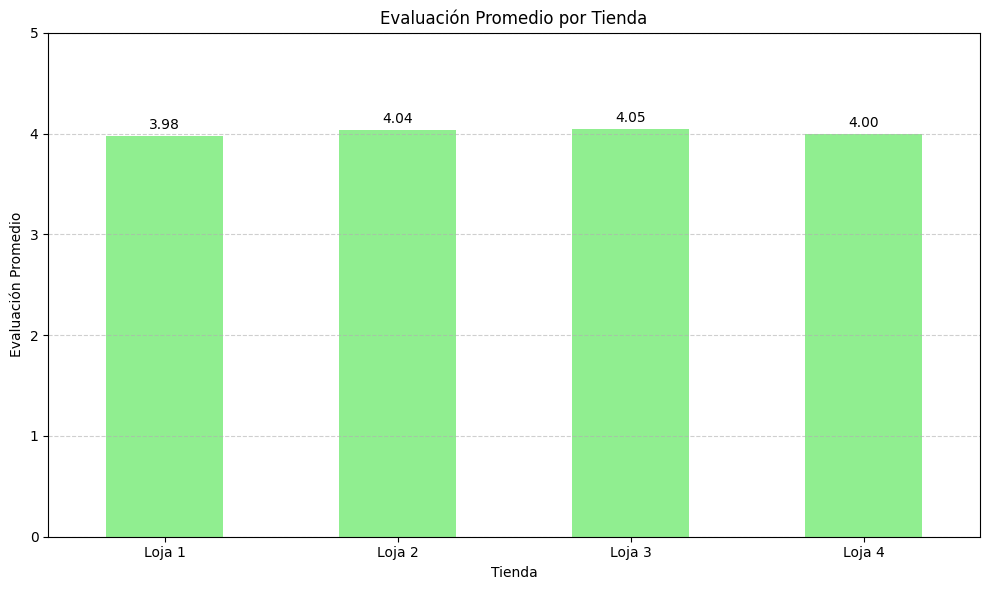

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the 'avaliacao' DataFrame from df_resumen
avaliacao = df_resumen[['Tienda', 'Evaluación Promedio']].copy()
avaliacao.rename(columns={'Evaluación Promedio': 'Evaluación promedio'}, inplace=True)

ax = avaliacao.plot(
    kind='bar',
    x='Tienda',
    y='Evaluación promedio',
    legend=False,
    color='lightgreen',
    figsize=(10, 6)
)

ax.set_title('Evaluación Promedio por Tienda')
ax.set_xlabel('Tienda')
ax.set_ylabel('Evaluación Promedio')
ax.set_ylim(0, 5)

# Agregar etiquetas numéricas sobre cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Productos Más Vendidos y Menos Vendidos

In [1]:
fig, axs = plt.subplots(4, 2, figsize=(20, 18))

# Define the 'tiendas' dictionary
tiendas = {
    'Loja 1': loja1,
    'Loja 2': loja2,
    'Loja 3': loja3,
    'Loja 4': loja4
}

for i, (nombre, df) in enumerate(tiendas.items()):

    # =========================
    # TOP 4 MÁS VENDIDOS
    # =========================
    top_qtd = df['Produto'].value_counts().head(4)

    top_data = (
        df[df['Produto'].isin(top_qtd.index)]
        .groupby('Produto')
        .agg(
            Cantidad=('Produto', 'count'),
            Facturacion=('Preço', 'sum'),
            Ticket_Promedio=('Preço', 'mean')
        )
        .sort_values(by='Cantidad', ascending=True)
    )

    bars = axs[i, 0].barh(top_data.index, top_data['Cantidad'], alpha=0.8)
    axs[i, 0].set_title(f'{nombre} - Top 4 Productos Más Vendidos', fontsize=11, fontweight='bold')
    axs[i, 0].set_xlabel('Cantidad de Ventas')

    for bar, (produto, row) in zip(bars, top_data.iterrows()):
        axs[i, 0].text(
            bar.get_width(),
            bar.get_y() + bar.get_height()/2,
            f"{int(row['Cantidad'])} | R$ {row['Facturacion']:,.0f} | TP: R$ {row['Ticket_Promedio']:,.0f}",
            va='center'
        )

    # =========================
    # TOP 4 MENOS VENDIDOS
    # =========================
    bottom_qtd = df['Produto'].value_counts().tail(4)

    bottom_data = (
        df[df['Produto'].isin(bottom_qtd.index)]
        .groupby('Produto')
        .agg(
            Cantidad=('Produto', 'count'),
            Facturacion=('Preço', 'sum'),
            Ticket_Promedio=('Preço', 'mean')
        )
        .sort_values(by='Cantidad', ascending=True)
    )

    bars = axs[i, 1].barh(bottom_data.index, bottom_data['Cantidad'], alpha=0.6)
    axs[i, 1].set_title(f'{nombre} - Top 4 Productos Menos Vendidos', fontsize=11, fontweight='bold')
    axs[i, 1].set_xlabel('Cantidad de Ventas')

    for bar, (produto, row) in zip(bars, bottom_data.iterrows()):
        axs[i, 1].text(
            bar.get_width(),
            bar.get_y() + bar.get_height()/2,
            f"{int(row['Cantidad'])} | R$ {row['Facturacion']:,.0f} | TP: R$ {row['Ticket_Promedio']:,.0f}",
            va='center'
        )

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

# 5. Costo Promedio de Envío por Tienda

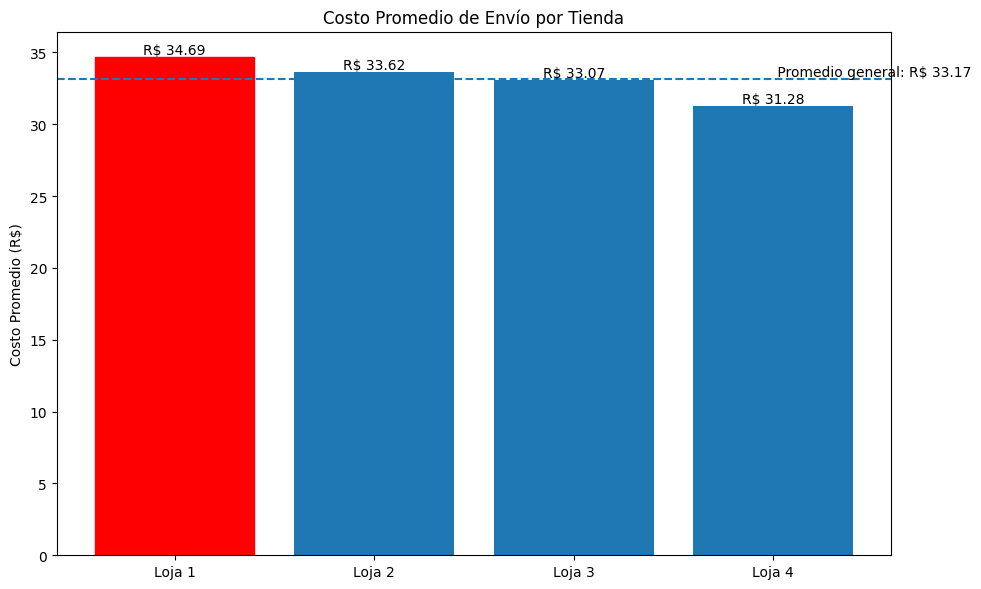

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# URLs
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Cargar datos
loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Calcular promedio de envío
envio = pd.DataFrame({
    'Tienda': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Costo envío promedio': [
        loja1['Frete'].mean(),
        loja2['Frete'].mean(),
        loja3['Frete'].mean(),
        loja4['Frete'].mean()
    ]
})

# Ordenar de mayor a menor (visión estratégica)
envio = envio.sort_values(by='Costo envío promedio', ascending=False)

# Promedio general
promedio_general = envio['Costo envío promedio'].mean()

# Crear gráfico
fig, ax = plt.subplots(figsize=(10,6))
bars = ax.bar(envio['Tienda'], envio['Costo envío promedio'])

# Resaltar la tienda con mayor costo
bars[0].set_color('red')

# Agregar etiquetas numéricas
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'R$ {height:,.2f}',
        ha='center',
        va='bottom'
    )

# Línea del promedio general
ax.axhline(promedio_general, linestyle='--')
ax.text(
    3,
    promedio_general,
    f' Promedio general: R$ {promedio_general:,.2f}',
    va='bottom'
)

# Títulos
ax.set_title('Costo Promedio de Envío por Tienda')
ax.set_ylabel('Costo Promedio (R$)')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Task
Analyze the sales data from "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv", "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv", "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv", and "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv" by calculating the total sales for each product category across all stores, combining this data, and visualizing the results with a chart. Finally, summarize the key insights from this category sales analysis, identifying the best-performing categories overall and in individual stores.

## Calculate Sales by Category for Each Store

### Subtask:
For each store's DataFrame (loja1, loja2, loja3, loja4), group the data by 'Categoria do Produto' and sum the 'Preço' to get the total sales for each category within that store.


**Reasoning**:
I will calculate the sales by category for each store by grouping the data by 'Categoria do Produto' and summing the 'Preço' column for each of the four store dataframes.



In [28]:
vendas_por_categoria_loja1 = loja1.groupby('Categoria do Produto')['Preço'].sum()
vendas_por_categoria_loja2 = loja2.groupby('Categoria do Produto')['Preço'].sum()
vendas_por_categoria_loja3 = loja3.groupby('Categoria do Produto')['Preço'].sum()
vendas_por_categoria_loja4 = loja4.groupby('Categoria do Produto')['Preço'].sum()

print('Vendas por Categoria - Loja 1:')
print(vendas_por_categoria_loja1)
print('\nVendas por Categoria - Loja 2:')
print(vendas_por_categoria_loja2)
print('\nVendas por Categoria - Loja 3:')
print(vendas_por_categoria_loja3)
print('\nVendas por Categoria - Loja 4:')
print(vendas_por_categoria_loja4)

Vendas por Categoria - Loja 1:
Categoria do Produto
brinquedos                23993.78
eletrodomesticos         484913.36
eletronicos              572659.23
esporte e lazer           52387.55
instrumentos musicais    121731.69
livros                    11713.92
moveis                   250178.11
utilidades domesticas     16931.48
Name: Preço, dtype: float64

Vendas por Categoria - Loja 2:
Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64

Vendas por Categoria - Loja 3:
Categoria do Produto
brinquedos                25869.20
eletrodomesticos         438984.89
eletronicos              547699.92
esporte e lazer           47456.10
instrumentos musicais    103174.45
livros                    12664.70
moveis          

**Reasoning**:
The previous step successfully calculated the sales per category for each store. To combine this information for overall analysis and visualization, I need to concatenate these individual store category sales Series into a single DataFrame.



In [29]:
vendas_por_categoria_total = pd.concat([
    vendas_por_categoria_loja1.rename('Loja 1'),
    vendas_por_categoria_loja2.rename('Loja 2'),
    vendas_por_categoria_loja3.rename('Loja 3'),
    vendas_por_categoria_loja4.rename('Loja 4')
], axis=1).fillna(0)

print('Vendas Totais por Categoria em Todas as Lojas:')
print(vendas_por_categoria_total)

Vendas Totais por Categoria em Todas as Lojas:
                          Loja 1     Loja 2     Loja 3     Loja 4
Categoria do Produto                                             
brinquedos              23993.78   21262.21   25869.20   27015.67
eletrodomesticos       484913.36  464758.13  438984.89  377680.65
eletronicos            572659.23  547773.71  547699.92  545966.86
esporte e lazer         52387.55   46326.09   47456.10   44465.65
instrumentos musicais  121731.69  139987.03  103174.45  100136.50
livros                  11713.92   13454.35   12664.70   12427.77
moveis                 250178.11  235234.68  268095.56  256705.65
utilidades domesticas   16931.48   19662.86   20080.21   20098.83


**Reasoning**:
Now that the sales by category for each store are combined into a single DataFrame, the next logical step to facilitate visualization and overall analysis is to calculate the total sales for each category across all stores. This will provide a consolidated view of category performance.



In [30]:
vendas_totais_por_categoria = vendas_por_categoria_total.sum(axis=1)

print('Vendas Totais por Categoria (Todas as Lojas Combinadas):')
print(vendas_totais_por_categoria)

Vendas Totais por Categoria (Todas as Lojas Combinadas):
Categoria do Produto
brinquedos                 98140.86
eletrodomesticos         1766337.03
eletronicos              2214099.72
esporte e lazer           190635.39
instrumentos musicais     465029.67
livros                     50260.74
moveis                   1010214.00
utilidades domesticas      76773.38
dtype: float64


**Reasoning**:
With the total sales per category across all stores calculated, the next step is to visualize these results. A bar chart is suitable for comparing sales across different product categories, which will help identify the best-performing ones visually.



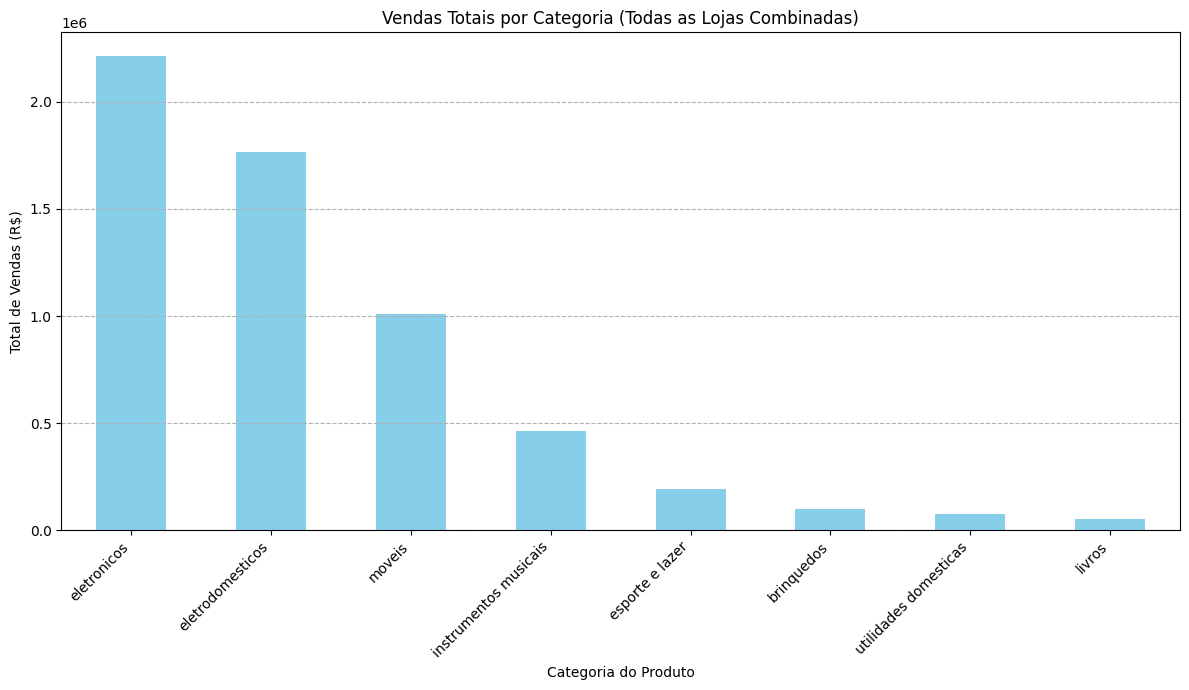

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
vendas_totais_por_categoria.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Vendas Totais por Categoria (Todas as Lojas Combinadas)')
plt.xlabel('Categoria do Produto')
plt.ylabel('Total de Vendas (R$)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

### Key Insights from Category Sales Analysis

**Overall Best-Performing Categories:**

Based on the combined sales data across all stores, the `eletronicos` (electronics) category is clearly the best-performing, followed by `eletrodomesticos` (home appliances) and `moveis` (furniture).

*   **Eletronicos:** Generated the highest total sales, indicating strong demand for electronic products across all stores.
*   **Eletrodomesticos:** Ranked second, showing significant sales in household appliances.
*   **Moveis:** Secured the third position, highlighting a consistent demand for furniture.

**Individual Store Performance by Category:**

Analyzing the `vendas_por_categoria_total` DataFrame, we can observe category performance per store:

*   **Eletronicos:** Consistently the top-selling category in all four stores, demonstrating its universal appeal and high market share.
*   **Eletrodomesticos:** Also performs strongly across all stores, generally ranking as the second-highest category in sales.
*   **Moveis:** Shows robust sales in every store, typically holding the third position.
*   **Instrumentos Musicais:** While not a top-tier category overall, it shows noticeable contributions, especially in Loja 2 where it performed relatively better compared to other categories in that specific store.
*   **Esporte e Lazer, Brinquedos, Livros, e Utilidades Domesticas:** These categories generally have lower sales volumes compared to the top three, both overall and in individual stores.

**Conclusion:**

The sales analysis clearly indicates that **electronics**, **home appliances**, and **furniture** are the primary revenue drivers for all stores. Stores should continue to focus on these categories, potentially optimizing inventory and marketing strategies to further capitalize on their popularity. Other categories, while contributing less, might still be important for diversification or niche markets, and their performance could be reviewed for targeted improvements.

## Final Task

### Subtask:
Summarize the key insights from the category sales analysis, highlighting the best-performing categories overall and in individual stores.


## Summary:

### Q&A
The best-performing categories overall are `eletronicos` (electronics), `eletrodomesticos` (home appliances), and `moveis` (furniture). In individual stores, `eletronicos` consistently ranks as the top-selling category across all four stores. `Eletrodomesticos` and `moveis` also show strong and consistent performance in all stores, generally holding the second and third positions, respectively. `Instrumentos Musicais` demonstrated a relatively better performance in Loja 2 compared to other categories within that specific store.

### Data Analysis Key Findings
*   **Overall Top Categories:** Across all stores, `eletronicos` generated the highest total sales, followed by `eletrodomesticos` and `moveis`, ranking as the top three revenue drivers.
*   **Consistent High Performers:** `Eletronicos`, `eletrodomesticos`, and `moveis` consistently performed strongly across all four stores, indicating broad market demand for these product types.
*   **Store-Specific Category Performance:** While `eletronicos` was the top category in every store, `instrumentos musicais` showed a noticeable contribution, particularly in Loja 2, suggesting potential niche strength.
*   **Lower Sales Categories:** Categories such as `Esporte e Lazer`, `Brinquedos`, `Livros`, and `Utilidades Domesticas` generally exhibited lower sales volumes compared to the top three, both overall and in individual stores.

### Insights or Next Steps
*   Focus on optimizing inventory and marketing strategies for `eletronicos`, `eletrodomesticos`, and `moveis` to further capitalize on their proven popularity and revenue-generating potential.
*   Evaluate the performance of lower-selling categories like `Instrumentos Musicais` on a store-by-store basis to identify specific opportunities or refine diversification strategies.
